In [8]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


# Combining data

combine all the data

In [20]:
keep_cols_all = ["CANONICAL_SMILES", "INCHIKEY", "active", "dataset", "data_type", "common_name", "action_type"]


# NCATS
This is a pretty messy AID, but we will take what we can get, was also classified prior to pubchem upload




In [21]:
ncats = pd.read_csv("processed/ncats_adme_aid1645841.csv")

In [22]:
ncats.head()

,CANONICAL_SMILES,INCHIKEY,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_CID,dataset,data_type,active,common_name,action_type
0,Cc1ccc2c(c1)c1c(n2CCc2ccc(C)nc2)CCN(C)C1,JNODQFNWMXFMEV-UHFFFAOYSA-N,Active,197033,ncats_adme_aid1645841,assay,True,NaN,inhibitor
1,O=c1c(O)c(-c2ccc(O)cc2O)oc2cc(O)cc(O)c12,YXOLAZRVSSWPPT-UHFFFAOYSA-N,Inactive,5281670,ncats_adme_aid1645841,assay,False,NaN,inhibitor
2,Cc1ccc(C(=O)NC2C(=O)NC(C(C)C)C(=O)N3CCCC3C(=O)...,GQBHKSFHNFMVES-TYWDLNKHSA-N,Inconclusive,6604832,ncats_adme_aid1645841,assay,False,NaN,inhibitor
3,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,KZNIFHPLKGYRTM-UHFFFAOYSA-N,Active,5280443,ncats_adme_aid1645841,assay,True,NaN,inhibitor
4,NC(Cc1ccc(O)c(O)c1)C(=O)O,WTDRDQBEARUVNC-UHFFFAOYSA-N,Active,836,ncats_adme_aid1645841,assay,True,NaN,inhibitor


In [23]:
ncats_actives = ncats.query("active == True")
ncats_actives = ncats_actives[keep_cols_all]
ncats_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
0,Cc1ccc2c(c1)c1c(n2CCc2ccc(C)nc2)CCN(C)C1,JNODQFNWMXFMEV-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor
3,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,KZNIFHPLKGYRTM-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor
4,NC(Cc1ccc(O)c(O)c1)C(=O)O,WTDRDQBEARUVNC-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor
6,CC1=NN=C(c2ccc(N)cc2)c2cc3c(cc2C1)OCO3,LFBZZHVSGAHQPP-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor
7,CC(=O)C1(O)C=C2C(=O)c3c(c(O)c4ccccc4c3O)C(=O)C...,SZWGDFGULWLMIP-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor
...,...,...,...,...,...,...,...
5223,Cc1cc(N)c2ccccc2[n+]1CCCCCCCCCC[n+]1c(C)cc(N)c...,PCSWXVJAIHCTMO-UHFFFAOYSA-P,True,ncats_adme_aid1645841,assay,NaN,inhibitor
5227,CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]...,CJBJHOAVZSMMDJ-HEXNFIEUSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor
5228,O=C(Nc1cccc2c(=O)cc(-c3nn[nH]n3)oc12)c1ccc(OCC...,NBQKINXMPLXUET-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor
5232,CCCCCCCC/C=C\CCCCCCCC(=O)NCc1ccc(O)c(OC)c1,OPZKBPQVWDSATI-KHPPLWFESA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor


# Veith

Assay data from veith et al


In [24]:
veith = pd.read_csv("processed/veith_2009.csv")
veith.head()

,PubChemCID,SMILES,active,CANONICAL_SMILES,INCHIKEY,dataset,data_type,common_name,action_type
0,6602638.0,CCCC(=O)Nc1ccc(N2CCN(CC)CC2)c(Cl)c1.Cl,False,CCCC(=O)Nc1ccc(N2CCN(CC)CC2)c(Cl)c1,ULLDFBZUOXJYID-UHFFFAOYSA-N,veith_2009,assay,NaN,inhibitor
1,644510.0,O=c1[nH]c2cc3c(cc2cc1CN(CCCO)Cc1nnnn1Cc1ccc(F)...,True,O=c1[nH]c2cc3c(cc2cc1CN(CCCO)Cc1nnnn1Cc1ccc(F)...,VTLXYSNKFGEFDQ-UHFFFAOYSA-N,veith_2009,assay,NaN,inhibitor
2,644675.0,CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1,True,CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1,GEUQHFHLRHDTPU-UHFFFAOYSA-N,veith_2009,assay,NaN,inhibitor
3,644890.0,COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1,True,COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1,JGYZDKDCKPRYSN-UHFFFAOYSA-N,veith_2009,assay,NaN,inhibitor
4,645063.0,CC(=O)Nc1cccc(NC(=O)C2CCCN2C(=O)Nc2ccccc2C)c1,False,CC(=O)Nc1cccc(NC(=O)C2CCCN2C(=O)Nc2ccccc2C)c1,SZEOGUBNOIXRLP-UHFFFAOYSA-N,veith_2009,assay,NaN,inhibitor


In [27]:
veith_actives = veith.query("active == True")
veith_actives = veith_actives[keep_cols_all]
veith_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
1,O=c1[nH]c2cc3c(cc2cc1CN(CCCO)Cc1nnnn1Cc1ccc(F)...,VTLXYSNKFGEFDQ-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
2,CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1,GEUQHFHLRHDTPU-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
3,COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1,JGYZDKDCKPRYSN-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
5,CCC(c1nnnn1CC1CCCO1)N(CCN1CCOCC1)Cc1cc2cc(C)cc...,NFTSIGQBJYZZLX-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
10,CCN(CC)C(=O)CSc1nnc(-c2cc3ccccc3cc2O)n1CC,VVRVXVFZSWROHR-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
...,...,...,...,...,...,...,...
12290,CC[C@@H](c1ccccc1)n1c(=O)n2n(c1=O)[C@H]1[C@H](...,ZLCSKEDISVLOJH-RWKWVPCPSA-N,True,veith_2009,assay,NaN,inhibitor
12296,O=c1n(Cc2cc3c(cc2Cl)OCO3)c(=O)n2n1CC[C@H]1/C(=...,OFANGNFUSNKWLW-ICBRJBJWSA-N,True,veith_2009,assay,NaN,inhibitor
12297,CC(C)CO/N=C1/[C@H]2O[C@@H]2[C@@H](O)[C@H]2[C@H...,XQGYPVYSJBOIOQ-LXUUIWEGSA-N,True,veith_2009,assay,NaN,inhibitor
12299,O=c1n(Cc2cc3c(cc2Cl)OCO3)c(=O)n2n1CC[C@H]1/C(=...,DFKPBUZAUWTLJY-KVRHHBQGSA-N,True,veith_2009,assay,NaN,inhibitor


# Chembl

The chembl data is an aggregation for CYP3A4  P08684

Some postprocessing steps have been applied to select high quality actives from the range of assays available, defs not the only way to do this. 




* Select assays with IC50, AC50, pIC50, XC50, EC50, Ki or potency endpoints
* Select assays in nM
* Select assays with >=  N molecules (10)
* Select compounds with mean pChembl > 5 accross all assays
* Select compounds that appear in >= L of assays



In [28]:
chembl_actives = pd.read_csv("processed/chembl_active_selected.csv")
chembl_actives.head()

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active
0,CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,XMAYWYJOQHXEEK-UHFFFAOYSA-N,7.013500,0.618796,KETOCONAZOLE,21,NaN,ChEMBL_curated,True
1,CCC1C(=O)OC[C@H]1Cc1cncn1C,QCHFTSOMWOSFHM-HNHGDDPOSA-N,5.052941,0.285302,SALAGEN,17,NaN,ChEMBL_curated,True
2,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,VNFPBHJOKIVQEB-UHFFFAOYSA-N,7.237692,0.358798,CLOTRIMAZOLE,14,NaN,ChEMBL_curated,True
3,CNCCCC12CCC(c3ccccc31)c1ccccc12,QSLMDECMDJKHMQ-UHFFFAOYSA-N,5.473846,0.281470,MAPROTILINE HYDROCHLORIDE,13,NaN,ChEMBL_curated,True
4,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,BYBLEWFAAKGYCD-UHFFFAOYSA-N,6.060000,0.608590,MICONAZOLE NITRATE,12,NaN,ChEMBL_curated,True


# FDA approved

Compounds the FDA really reccomends you try

In [29]:
fda = pd.read_csv("./processed/fda.csv")

# Flockheart 

In [30]:
flockheart = pd.read_csv("processed/flockheart.csv")

# PubChem AID 1851

In [31]:
aid1851 = pd.read_csv("processed/AID_1851.csv")
aid1851_actives = aid1851.query("active == True")
aid1851_actives = aid1851_actives[keep_cols_all]
aid1851_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
1,O=c1[nH]c2cc3c(cc2cc1CN(CCCO)Cc1nnnn1Cc1ccc(F)...,VTLXYSNKFGEFDQ-UHFFFAOYSA-N,True,aid1851,assay,NaN,inhibitor
3,CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1,GEUQHFHLRHDTPU-UHFFFAOYSA-N,True,aid1851,assay,NaN,inhibitor
5,COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1,JGYZDKDCKPRYSN-UHFFFAOYSA-N,True,aid1851,assay,NaN,inhibitor
8,CCC(c1nnnn1CC1CCCO1)N(CCN1CCOCC1)Cc1cc2cc(C)cc...,NFTSIGQBJYZZLX-UHFFFAOYSA-N,True,aid1851,assay,NaN,inhibitor
14,CCN(CC)C(=O)CSc1nnc(-c2cc3ccccc3cc2O)n1CC,VVRVXVFZSWROHR-UHFFFAOYSA-N,True,aid1851,assay,NaN,inhibitor
...,...,...,...,...,...,...,...
17068,CC(C)CO/N=C1/[C@H]2O[C@@H]2[C@@H](O)[C@H]2[C@H...,XQGYPVYSJBOIOQ-LXUUIWEGSA-N,True,aid1851,assay,NaN,inhibitor
17071,O=c1n(Cc2cc3c(cc2Cl)OCO3)c(=O)n2n1CC[C@H]1/C(=...,DFKPBUZAUWTLJY-KVRHHBQGSA-N,True,aid1851,assay,NaN,inhibitor
17075,O=C1C2=CCc3c(c(O)n(Cc4ccc5c(c4)OCO5)c3O)[C@@H]...,DNVWSWBUBQYWLG-DXDGOQJESA-N,True,aid1851,assay,NaN,inhibitor
17087,O=C1C[C@@H](O)[C@@H](O)[C@H]2c3c(c(O)n(Cc4ccc5...,QXCOZNRZGCDDED-GAKFPUJSSA-N,True,aid1851,assay,NaN,inhibitor


# PubChem AID 1919971

A lot of these smiles were kind of messed up, we won't go deeper here

In [35]:
aid1919971 = pd.read_csv("processed/AID_1919971.csv")
aid1919971_actives = aid1919971.query("active == True")
aid1919971_actives = aid1919971_actives[keep_cols_all]
aid1919971_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
0,CC(C)=CCOc1c2occc2cc2ccc(=O)oc12,OLOOJGVNMBJLLR-UHFFFAOYSA-N,True,aid191971,assay,NaN,inhibitor
1,CC(=O)O[C@@H]1C[C@@H](C)[C@](O)(CCC2=CC(=O)OC2...,FBWWXAGANVJTLU-BKFIFAIMSA-N,True,aid191971,assay,NaN,inhibitor
2,C=C(C)[C@@H]1CCC(C)=C[C@H]1c1c(O)cc(CCCCC)cc1O,QHMBSVQNZZTUGM-ZWKOTPCHSA-N,True,aid191971,assay,NaN,inhibitor
3,O=C(OC[C@H]1O[C@@H](OC(=O)c2cc(O)c(O)c(O)c2)[C...,QJYNZEYHSMRWBK-NIKIMHBISA-N,True,aid191971,assay,NaN,inhibitor
4,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,KZNIFHPLKGYRTM-UHFFFAOYSA-N,True,aid191971,assay,NaN,inhibitor
5,COc1cc(-c2oc3cc(O)cc(O)c3c(=O)c2O)ccc1O,IZQSVPBOUDKVDZ-UHFFFAOYSA-N,True,aid191971,assay,NaN,inhibitor
6,Cc1cc(O)c2c(c1)C(=O)c1cc(O)cc(O)c1C2=O,RHMXXJGYXNZAPX-UHFFFAOYSA-N,True,aid191971,assay,NaN,inhibitor
7,Oc1ccc(C=Cc2cc(O)cc(O)c2)cc1,LUKBXSAWLPMMSZ-UHFFFAOYSA-N,True,aid191971,assay,NaN,inhibitor
8,O=C(OC[C@H]1O[C@@H](OC(=O)c2cc(O)c(O)c(O)c2)[C...,RATQVALKDAUZBW-XPMKZLBQSA-N,True,aid191971,assay,NaN,inhibitor
9,COC(=O)C1=CO[C@@H](C)[C@@H]2CN3CC[C@@]4(C(=O)N...,JMIAZDVHNCCPDM-KYTNJUKWSA-N,True,aid191971,assay,NaN,inhibitor


# PubChem AID 884

In [37]:
aid884 = pd.read_csv("processed/AID_884.csv")
aid884_actives = aid884.query("active == True")
aid884_actives = aid884_actives[keep_cols_all]
aid884_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
2,COc1ccc(-c2nc3cnc(OC)nc3n(Cc3ccc(F)cc3)c2=O)cc1,LSZNTYYDGMZAQA-UHFFFAOYSA-N,True,aid884,assay,NaN,inhibitor
8,Cc1cnc(CNc2cc(-c3ccc(N(C)C)cc3)ncn2)cn1,DAKKMYZKBHRHRE-UHFFFAOYSA-N,True,aid884,assay,NaN,inhibitor
9,CC(C(=O)N[C@@H](CO)Cc1ccccc1)[C@@H]1C[C@@]1(C)...,ACGNORVVGCXOJV-MQBOFBGISA-N,True,aid884,assay,NaN,inhibitor
21,COc1ccc(CNC(=O)C(C)[C@@H]2C[C@@]2(C)[C@@H](NC(...,RIHPJAMHMFMAPP-YWOFYXMZSA-N,True,aid884,assay,NaN,inhibitor
26,CN(C)Cc1ccccc1-c1ccc2ncnc(NC3CC3)c2c1,PXLBRCPUPPMGEY-UHFFFAOYSA-N,True,aid884,assay,NaN,inhibitor
...,...,...,...,...,...,...,...
14136,CN(Cc1ccco1)c1ncncc1-c1ccccc1C(F)(F)F,KPTNZRIVAJCXMS-UHFFFAOYSA-N,True,aid884,assay,NaN,inhibitor
14143,C[C@@]12C=CC(=O)C=C1CC[C@@H]1C2=CC[C@@]2(C)C(C...,LBGLGTAQLROFTM-LOCAXYBYSA-N,True,aid884,assay,NaN,inhibitor
14144,COc1ccccc1-c1nc(NCc2ccccc2)c2ccccc2n1,RKHOJSWKFZTTDY-UHFFFAOYSA-N,True,aid884,assay,NaN,inhibitor
14151,CCN(CC)CCOC(=O)C(Cc1cccc2ccccc12)CC1CCCO1,KBAFPSLPKGSANY-UHFFFAOYSA-N,True,aid884,assay,NaN,inhibitor


# PubChem AID 167201

In [38]:
aid167201 = pd.read_csv("processed/AID_167201.csv")
aid167201_actives = aid167201.query("active == True")
aid167201_actives = aid167201_actives[keep_cols_all]
aid167201_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
1,COC(=O)C1[C@H]2C[C@@H]3c4[nH]c5cc(OC)ccc5c4CCN...,KFDDPVMIQMFHBI-VEFOKBAZSA-N,True,aid167201,assay,NaN,inhibitor
2,C[C@]12Cc3nonc3C[C@@H]1CC[C@@H]1[C@@H]2CC[C@@]...,RGLLOUBXMOGLDQ-IVEVATEUSA-N,True,aid167201,assay,NaN,inhibitor
3,C/C(=C(\CCO)SS/C(CCO)=C(\C)N(C=O)Cc1cnc(C)nc1N...,GFEGEDUIIYDMOX-KBNZVFGVSA-N,True,aid167201,assay,NaN,inhibitor
5,CCCC(=O)OC[C@@H](OC(=O)CCC)[C@@H](OC(=O)CCC)[C...,MJNIWUJSIGSWKK-BBANNHEPSA-N,True,aid167201,assay,NaN,inhibitor
6,CCCCOC(=O)CC(CC(=O)OCCCC)(OC(C)=O)C(=O)OCCCC,QZCLKYGREBVARF-UHFFFAOYSA-N,True,aid167201,assay,NaN,inhibitor
...,...,...,...,...,...,...,...
9615,Cc1cc(C)c(C(=O)P(=O)(c2ccccc2)c2ccccc2)c(C)c1,VFHVQBAGLAREND-UHFFFAOYSA-N,True,aid167201,assay,NaN,inhibitor
9620,C=Cc1ccc(O)c(OC)c1,YOMSJEATGXXYPX-UHFFFAOYSA-N,True,aid167201,assay,NaN,inhibitor
9631,C#CC1=C(C#C)C(=O)C(Cl)=C(Cl)C1=O,WFTZPGGPRHBTDC-UHFFFAOYSA-N,True,aid167201,assay,NaN,inhibitor
9648,C/C=C/c1ccc(OC)c(OC)c1,NNWHUJCUHAELCL-SNAWJCMRSA-N,True,aid167201,assay,NaN,inhibitor


# Combine everything


## NOTE

common name being blank is not that these compounds do not have a common name, but that they need to be pulled from pubchem

In [39]:
combined_literature = pd.concat([ncats_actives, veith_actives,  fda, flockheart, aid1851_actives, aid167201_actives, aid1919971_actives, aid884_actives])
combined_literature

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,FDA_recommended,SMILES
0,Cc1ccc2c(c1)c1c(n2CCc2ccc(C)nc2)CCN(C)C1,JNODQFNWMXFMEV-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,NaN,NaN
3,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,KZNIFHPLKGYRTM-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,NaN,NaN
4,NC(Cc1ccc(O)c(O)c1)C(=O)O,WTDRDQBEARUVNC-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,NaN,NaN
6,CC1=NN=C(c2ccc(N)cc2)c2cc3c(cc2C1)OCO3,LFBZZHVSGAHQPP-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,NaN,NaN
7,CC(=O)C1(O)C=C2C(=O)c3c(c(O)c4ccccc4c3O)C(=O)C...,SZWGDFGULWLMIP-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,NaN,NaN
...,...,...,...,...,...,...,...,...,...
14136,CN(Cc1ccco1)c1ncncc1-c1ccccc1C(F)(F)F,KPTNZRIVAJCXMS-UHFFFAOYSA-N,True,aid884,assay,NaN,inhibitor,NaN,NaN
14143,C[C@@]12C=CC(=O)C=C1CC[C@@H]1C2=CC[C@@]2(C)C(C...,LBGLGTAQLROFTM-LOCAXYBYSA-N,True,aid884,assay,NaN,inhibitor,NaN,NaN
14144,COc1ccccc1-c1nc(NCc2ccccc2)c2ccccc2n1,RKHOJSWKFZTTDY-UHFFFAOYSA-N,True,aid884,assay,NaN,inhibitor,NaN,NaN
14151,CCN(CC)CCOC(=O)C(Cc1cccc2ccccc12)CC1CCCO1,KBAFPSLPKGSANY-UHFFFAOYSA-N,True,aid884,assay,NaN,inhibitor,NaN,NaN


In [40]:
combined_literature["FDA_recommended"] = combined_literature["FDA_recommended"].fillna(False)

In [41]:
combined_literature.INCHIKEY.duplicated().sum()  # close same result with SMILES

np.int64(8842)

In [42]:
combined_literature.dropna(subset="INCHIKEY", inplace=True)

In [43]:
combined_literature_chembl = pd.concat([combined_literature, chembl_actives])

In [44]:
combined_literature_chembl

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,FDA_recommended,SMILES,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays
0,Cc1ccc2c(c1)c1c(n2CCc2ccc(C)nc2)CCN(C)C1,JNODQFNWMXFMEV-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,False,NaN,NaN,NaN,NaN
3,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,KZNIFHPLKGYRTM-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,False,NaN,NaN,NaN,NaN
4,NC(Cc1ccc(O)c(O)c1)C(=O)O,WTDRDQBEARUVNC-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,False,NaN,NaN,NaN,NaN
6,CC1=NN=C(c2ccc(N)cc2)c2cc3c(cc2C1)OCO3,LFBZZHVSGAHQPP-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,False,NaN,NaN,NaN,NaN
7,CC(=O)C1(O)C=C2C(=O)c3c(c(O)c4ccccc4c3O)C(=O)C...,SZWGDFGULWLMIP-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7948,Oc1ccc(-c2[nH]ncc2-c2ccc(Cl)cc2)c(O)c1,XWIOVBFOMIECGL-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.25,NaN,1.0
7949,COc1cc(Br)cc(C=NNC(=O)C(C)n2cc([N+](=O)[O-])c(...,LNYRXTMMCOETEA-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.00,NaN,1.0
7950,O=C(CSc1nnnn1-c1ccccc1)NCc1cccs1,AGCFGMRJYNGOCI-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.60,NaN,1.0
7951,CCc1cccc(NC(=O)CN(C)S(=O)(=O)c2c[nH]cn2)c1,MWUWPBOVIGVXOG-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.60,NaN,1.0


In [45]:
combined_literature_chembl.FDA_recommended.value_counts()

FDA_recommended
False    17935
 True        8
Name: count, dtype: int64

In [46]:
combined_literature_chembl.dataset.value_counts()

dataset
ChEMBL_curated           7953
aid1851                  5265
veith_2009               5110
aid884                   3569
ncats_adme_aid1645841    2146
aid167201                1777
flockheart                 41
aid191971                  27
FDA                         8
Name: count, dtype: int64

In [47]:
combined_literature_chembl.INCHIKEY.duplicated().sum()

np.int64(12940)

In [48]:
combined_literature_chembl.INCHIKEY.isna().sum()

np.int64(0)

In [49]:
combined_literature_chembl

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,FDA_recommended,SMILES,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays
0,Cc1ccc2c(c1)c1c(n2CCc2ccc(C)nc2)CCN(C)C1,JNODQFNWMXFMEV-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,False,NaN,NaN,NaN,NaN
3,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,KZNIFHPLKGYRTM-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,False,NaN,NaN,NaN,NaN
4,NC(Cc1ccc(O)c(O)c1)C(=O)O,WTDRDQBEARUVNC-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,False,NaN,NaN,NaN,NaN
6,CC1=NN=C(c2ccc(N)cc2)c2cc3c(cc2C1)OCO3,LFBZZHVSGAHQPP-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,False,NaN,NaN,NaN,NaN
7,CC(=O)C1(O)C=C2C(=O)c3c(c(O)c4ccccc4c3O)C(=O)C...,SZWGDFGULWLMIP-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7948,Oc1ccc(-c2[nH]ncc2-c2ccc(Cl)cc2)c(O)c1,XWIOVBFOMIECGL-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.25,NaN,1.0
7949,COc1cc(Br)cc(C=NNC(=O)C(C)n2cc([N+](=O)[O-])c(...,LNYRXTMMCOETEA-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.00,NaN,1.0
7950,O=C(CSc1nnnn1-c1ccccc1)NCc1cccs1,AGCFGMRJYNGOCI-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.60,NaN,1.0
7951,CCc1cccc(NC(=O)CN(C)S(=O)(=O)c2c[nH]cn2)c1,MWUWPBOVIGVXOG-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.60,NaN,1.0


In [50]:
appears = combined_literature_chembl.groupby("INCHIKEY")["dataset"].nunique().reset_index(name="appears_in_N_datasets")
appears.set_index("INCHIKEY")

,appears_in_N_datasets
INCHIKEY,
AAALVYBICLMAMA-UHFFFAOYSA-N,2
AAASNKNLMQBKFV-UHFFFAOYSA-N,2
AABFWJDLCCDJJN-UHFFFAOYSA-N,1
AABYLPRACHMDSN-BIWBPYCESA-N,4
AABYLPRACHMDSN-REETXPBOSA-N,4
...,...
ZZVUWRFHKOJYTH-UHFFFAOYSA-N,1
ZZVXVMRMJNDKKA-UHFFFAOYSA-N,1
ZZWKZQDOSJAGGF-WLNFFEQUSA-N,1


In [51]:
appears.isna().sum()

INCHIKEY                 0
appears_in_N_datasets    0
dtype: int64

<Axes: xlabel='appears_in_N_datasets', ylabel='count'>

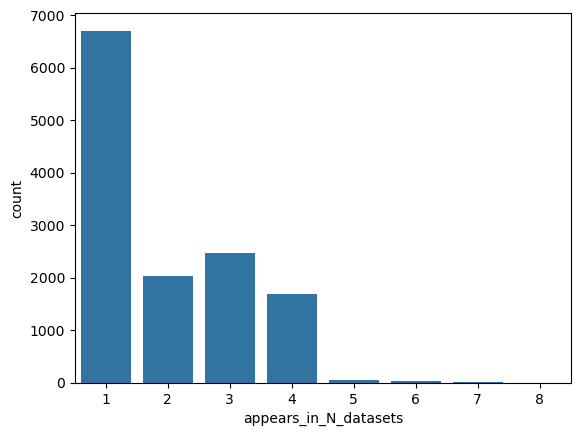

In [52]:
sns.countplot(data=appears, x="appears_in_N_datasets")

In [53]:
combined_literature_chembl_w_counts = combined_literature_chembl.merge(appears, on="INCHIKEY")
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,FDA_recommended,SMILES,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays,appears_in_N_datasets
0,Cc1ccc2c(c1)c1c(n2CCc2ccc(C)nc2)CCN(C)C1,JNODQFNWMXFMEV-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,False,NaN,NaN,NaN,NaN,1
1,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,KZNIFHPLKGYRTM-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,False,NaN,NaN,NaN,NaN,6
2,NC(Cc1ccc(O)c(O)c1)C(=O)O,WTDRDQBEARUVNC-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,False,NaN,NaN,NaN,NaN,1
3,CC1=NN=C(c2ccc(N)cc2)c2cc3c(cc2C1)OCO3,LFBZZHVSGAHQPP-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,False,NaN,NaN,NaN,NaN,4
4,CC(=O)C1(O)C=C2C(=O)c3c(c(O)c4ccccc4c3O)C(=O)C...,SZWGDFGULWLMIP-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,False,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25891,Oc1ccc(-c2[nH]ncc2-c2ccc(Cl)cc2)c(O)c1,XWIOVBFOMIECGL-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.25,NaN,1.0,3
25892,COc1cc(Br)cc(C=NNC(=O)C(C)n2cc([N+](=O)[O-])c(...,LNYRXTMMCOETEA-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.00,NaN,1.0,3
25893,O=C(CSc1nnnn1-c1ccccc1)NCc1cccs1,AGCFGMRJYNGOCI-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.60,NaN,1.0,1
25894,CCc1cccc(NC(=O)CN(C)S(=O)(=O)c2c[nH]cn2)c1,MWUWPBOVIGVXOG-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.60,NaN,1.0,3


In [54]:
df_dummies = pd.get_dummies(combined_literature_chembl_w_counts['dataset'], prefix='dataset').join(combined_literature_chembl_w_counts["INCHIKEY"])
df_dummies

,dataset_ChEMBL_curated,dataset_FDA,dataset_aid167201,dataset_aid1851,dataset_aid191971,dataset_aid884,dataset_flockheart,dataset_ncats_adme_aid1645841,dataset_veith_2009,INCHIKEY
0,False,False,False,False,False,False,False,True,False,JNODQFNWMXFMEV-UHFFFAOYSA-N
1,False,False,False,False,False,False,False,True,False,KZNIFHPLKGYRTM-UHFFFAOYSA-N
2,False,False,False,False,False,False,False,True,False,WTDRDQBEARUVNC-UHFFFAOYSA-N
3,False,False,False,False,False,False,False,True,False,LFBZZHVSGAHQPP-UHFFFAOYSA-N
4,False,False,False,False,False,False,False,True,False,SZWGDFGULWLMIP-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...
25891,True,False,False,False,False,False,False,False,False,XWIOVBFOMIECGL-UHFFFAOYSA-N
25892,True,False,False,False,False,False,False,False,False,LNYRXTMMCOETEA-UHFFFAOYSA-N
25893,True,False,False,False,False,False,False,False,False,AGCFGMRJYNGOCI-UHFFFAOYSA-N
25894,True,False,False,False,False,False,False,False,False,MWUWPBOVIGVXOG-UHFFFAOYSA-N


In [55]:
df_result = df_dummies.groupby('INCHIKEY').max().reset_index()
df_result = df_result.set_index("INCHIKEY")

In [56]:
# cat_dataname = combined_literature_chembl.groupby("INCHIKEY")["dataset"].apply(lambda x: "_+_".join(x)).reset_index(name="dataset_comb").set_index("INCHIKEY")
# cat_dataname

In [57]:
combined_literature_chembl_w_counts = combined_literature_chembl_w_counts.merge(df_result, on="INCHIKEY")
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,FDA_recommended,SMILES,pChEMBL mean,...,appears_in_N_datasets,dataset_ChEMBL_curated,dataset_FDA,dataset_aid167201,dataset_aid1851,dataset_aid191971,dataset_aid884,dataset_flockheart,dataset_ncats_adme_aid1645841,dataset_veith_2009
0,Cc1ccc2c(c1)c1c(n2CCc2ccc(C)nc2)CCN(C)C1,JNODQFNWMXFMEV-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,False,NaN,NaN,...,1,False,False,False,False,False,False,False,True,False
1,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,KZNIFHPLKGYRTM-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,False,NaN,NaN,...,6,True,False,True,True,True,True,False,True,False
2,NC(Cc1ccc(O)c(O)c1)C(=O)O,WTDRDQBEARUVNC-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,False,NaN,NaN,...,1,False,False,False,False,False,False,False,True,False
3,CC1=NN=C(c2ccc(N)cc2)c2cc3c(cc2C1)OCO3,LFBZZHVSGAHQPP-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,False,NaN,NaN,...,4,True,False,False,True,False,True,False,True,False
4,CC(=O)C1(O)C=C2C(=O)c3c(c(O)c4ccccc4c3O)C(=O)C...,SZWGDFGULWLMIP-UHFFFAOYSA-N,True,ncats_adme_aid1645841,assay,NaN,inhibitor,False,NaN,NaN,...,1,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25891,Oc1ccc(-c2[nH]ncc2-c2ccc(Cl)cc2)c(O)c1,XWIOVBFOMIECGL-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.25,...,3,True,False,False,True,False,False,False,False,True
25892,COc1cc(Br)cc(C=NNC(=O)C(C)n2cc([N+](=O)[O-])c(...,LNYRXTMMCOETEA-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.00,...,3,True,False,False,True,False,False,False,False,True
25893,O=C(CSc1nnnn1-c1ccccc1)NCc1cccs1,AGCFGMRJYNGOCI-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.60,...,1,True,False,False,False,False,False,False,False,False
25894,CCc1cccc(NC(=O)CN(C)S(=O)(=O)c2c[nH]cn2)c1,MWUWPBOVIGVXOG-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.60,...,3,True,False,False,True,False,False,False,False,True


In [58]:
combined_literature_chembl_w_counts.action_type.value_counts()

action_type
inhibitor     18081
 inhibitor        8
Name: count, dtype: int64

In [59]:
combined_literature_chembl_w_counts.INCHIKEY.nunique()

12956

In [60]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

np.int64(25378)

In [61]:
# we can just sort by appears_in_N_ChEMBL_assays to get all the chembl data at the top, then uniquify on INCHIKEY

combined_literature_chembl_w_counts.sort_values(["appears_in_N_ChEMBL_assays", "appears_in_N_datasets"], ascending=[False,False],  inplace=True)


In [62]:
# fill common name from gropupby 
combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


/tmp/ipykernel_163909/1877288904.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
/tmp/ipykernel_163909/1877288904.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [63]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

np.int64(24369)

In [64]:
combined_literature_chembl_w_counts.drop(columns=["dataset","data_type"], inplace=True)

In [65]:
combined_literature_chembl_w_counts.head()

,CANONICAL_SMILES,INCHIKEY,active,common_name,action_type,FDA_recommended,SMILES,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays,appears_in_N_datasets,dataset_ChEMBL_curated,dataset_FDA,dataset_aid167201,dataset_aid1851,dataset_aid191971,dataset_aid884,dataset_flockheart,dataset_ncats_adme_aid1645841,dataset_veith_2009
17943,CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,XMAYWYJOQHXEEK-UHFFFAOYSA-N,True,KETOCONAZOLE,NaN,NaN,NaN,7.013500,0.618796,21.0,2,True,True,False,False,False,False,False,False,False
17944,CCC1C(=O)OC[C@H]1Cc1cncn1C,QCHFTSOMWOSFHM-HNHGDDPOSA-N,True,SALAGEN,NaN,NaN,NaN,5.052941,0.285302,17.0,3,True,False,False,True,False,True,False,False,False
17945,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,VNFPBHJOKIVQEB-UHFFFAOYSA-N,True,CLOTRIMAZOLE,NaN,NaN,NaN,7.237692,0.358798,14.0,5,True,False,True,True,False,True,False,True,False
17946,CNCCCC12CCC(c3ccccc31)c1ccccc12,QSLMDECMDJKHMQ-UHFFFAOYSA-N,True,MAPROTILINE HYDROCHLORIDE,NaN,NaN,NaN,5.473846,0.281470,13.0,6,True,False,True,True,False,True,False,True,True
17947,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,BYBLEWFAAKGYCD-UHFFFAOYSA-N,True,MICONAZOLE NITRATE,NaN,NaN,NaN,6.060000,0.608590,12.0,5,True,False,False,True,False,True,False,True,True


In [66]:
fda_reccomends_mask = combined_literature_chembl_w_counts.INCHIKEY.isin(fda.INCHIKEY)

fda_reccomends_mask

17943     True
17944    False
17945    False
17946    False
17947    False
         ...  
17850    False
17860    False
17878    False
17896    False
17933    False
Name: INCHIKEY, Length: 25896, dtype: bool

In [67]:
combined_literature_chembl_w_counts["FDA_recommended"][fda_reccomends_mask] = True

/tmp/ipykernel_163909/383759248.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  combined_literature_chembl_w_counts["FDA_recommended"][fda_reccomends_mask] = True
/tmp/ipykernel_163909/383759248.py:1: SettingWithCopyWarning: 
A value is 

In [68]:
combined_literature_chembl_w_counts.drop_duplicates(subset="INCHIKEY", inplace=True)

In [69]:
combined_literature_chembl_w_counts["action_type"] = combined_literature_chembl_w_counts["action_type"].fillna("unknown")

In [70]:
combined_literature_chembl_w_counts["inclusion_score"] = combined_literature_chembl_w_counts["appears_in_N_ChEMBL_assays"].fillna(0) + combined_literature_chembl_w_counts["appears_in_N_datasets"].fillna(0)

In [74]:
combined_literature_chembl_w_counts["action_type"] = "inhibitor"

In [75]:
combined_literature_chembl_w_counts.sort_values("inclusion_score", ascending=False, inplace=True)

In [76]:
combined_literature_chembl_w_counts.to_csv("final/actives_final.csv", index=False)

In [77]:
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,common_name,action_type,FDA_recommended,SMILES,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays,...,dataset_ChEMBL_curated,dataset_FDA,dataset_aid167201,dataset_aid1851,dataset_aid191971,dataset_aid884,dataset_flockheart,dataset_ncats_adme_aid1645841,dataset_veith_2009,inclusion_score
17943,CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,XMAYWYJOQHXEEK-UHFFFAOYSA-N,True,KETOCONAZOLE,inhibitor,True,NaN,7.013500,0.618796,21.0,...,True,True,False,False,False,False,False,False,False,23.0
17944,CCC1C(=O)OC[C@H]1Cc1cncn1C,QCHFTSOMWOSFHM-HNHGDDPOSA-N,True,SALAGEN,inhibitor,NaN,NaN,5.052941,0.285302,17.0,...,True,False,False,True,False,True,False,False,False,20.0
17946,CNCCCC12CCC(c3ccccc31)c1ccccc12,QSLMDECMDJKHMQ-UHFFFAOYSA-N,True,MAPROTILINE HYDROCHLORIDE,inhibitor,NaN,NaN,5.473846,0.281470,13.0,...,True,False,True,True,False,True,False,True,True,19.0
17945,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,VNFPBHJOKIVQEB-UHFFFAOYSA-N,True,CLOTRIMAZOLE,inhibitor,NaN,NaN,7.237692,0.358798,14.0,...,True,False,True,True,False,True,False,True,False,19.0
17950,Oc1ccc(C=Cc2cc(O)cc(O)c2)cc1,LUKBXSAWLPMMSZ-UHFFFAOYSA-N,True,RESVERATROL,inhibitor,NaN,NaN,5.556364,0.235256,11.0,...,True,False,True,True,True,True,False,True,False,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16692,Cc1cc(-c2ccc(N=Nc3ccc4c(S(=O)(=O)O)cc(S(=O)(=O...,COXVTLYNGOIATD-UHFFFAOYSA-N,True,NaN,inhibitor,False,NaN,NaN,NaN,NaN,...,False,False,False,False,False,True,False,False,False,1.0
16703,COC(=O)c1ccc(C(NC(=O)OCc2ccccc2)/C(=C/C(C)C(=O...,OWXYLKNZEOFIJS-RDRPBHBLSA-N,True,NaN,inhibitor,False,NaN,NaN,NaN,NaN,...,False,False,False,False,False,True,False,False,False,1.0
16735,CC(C)=CCc1c(O)cc(O)c2c1O[C@H](c1ccccc1)CC2=O,DAWSYIQAGQMLFS-SFHVURJKSA-N,True,NaN,inhibitor,False,NaN,NaN,NaN,NaN,...,False,False,False,False,False,True,False,False,False,1.0
16740,COc1ccc(C2Sc3ccccc3N(CCN(C)C)C(=O)C2OC(C)=O)cc1,HSUGRBWQSSZJOP-UHFFFAOYSA-N,True,NaN,inhibitor,False,NaN,NaN,NaN,NaN,...,False,False,False,False,False,True,False,False,False,1.0
